In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [34]:
df = pd.read_csv('/content/employee_salary_dataset.csv')
df.head(10)      # see top 10 of our data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [35]:
df.describe()     # get more information

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


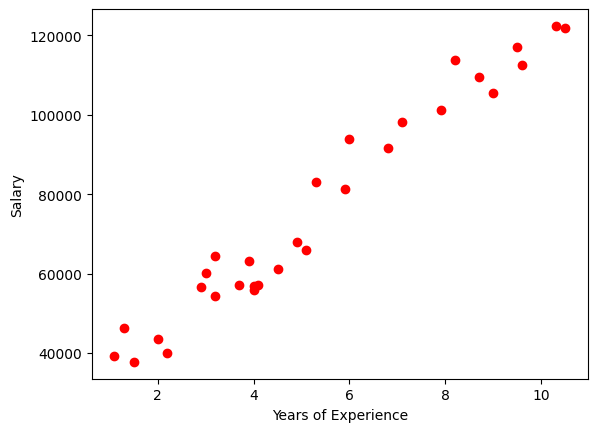

In [36]:
plt.scatter(df.YearsExperience	, df.Salary,  color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()           # show plot of our data(years of experience & salary)

In [37]:
msk = np.random.rand(len(df)) < 0.8      # Dividing our data into train(80%) and test(20%)
train = df[msk]
test = df[~msk]

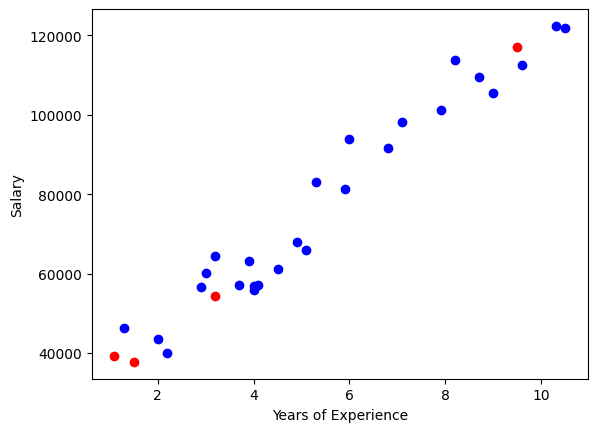

In [38]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')      # show to scatter in one chart
plt.scatter(test.YearsExperience, test.Salary,  color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [39]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])    # convert to array
train_y = np.asanyarray(train[['Salary']])             # convert to array
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9425.86666494]]
Intercept:  [25897.48513779]


Text(0, 0.5, 'Salary')

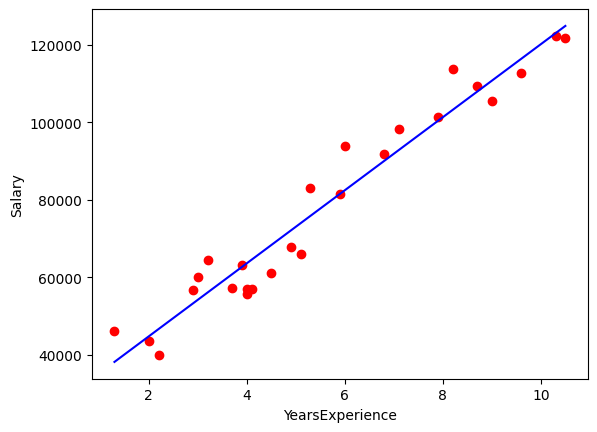

In [40]:
plt.scatter(train.YearsExperience, train.Salary,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')     # (θ_1 * x) + θ_0
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [41]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2130.85
Residual sum of squares (MSE): 4929929.11
R2-score: 1.00


In [42]:
from sklearn.metrics import r2_score
while True:
    try:
        desired_experience = float(input('enter your years of experiene: '))
        if desired_experience < 0:
            print('you can not enter negative number!!')
            continue
        break
    except ValueError:
        print('you have to just enter a number!!')



desired_experience_arr = np.array([[desired_experience]])     # convert to array
predicted_salary = regr.predict(desired_experience_arr)       # predict with desired_experience

print(f"Predicted salary for {desired_experience} years of experience is equal to: {float(predicted_salary[0][0]):.3f} $")


enter your years of experiene: 5.5
Predicted salary for 5.5 years of experience is equal to: 77739.752 $
